In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.layers import BatchNormalization

In [2]:
print(os.listdir("../input/Kannada-MNIST/"))

['sample_submission.csv', 'Dig-MNIST.csv', 'train.csv', 'test.csv']


In [3]:
df_train = pd.read_csv("../input/Kannada-MNIST/train.csv")
df_test = pd.read_csv("../input/Kannada-MNIST/test.csv")

In [4]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(5000, 785)


In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,0]
X_test_actual = df_test.iloc[:,1:]

In [8]:
X = X.to_numpy().reshape(len(X), 28, 28,1).astype('float32')
X_test_actual = X_test_actual.to_numpy().reshape(len(X_test_actual), 28, 28, 1).astype('float32')

In [9]:
X = X/255
X_test_actual = X_test_actual/255

In [10]:
n_classes=10
y = to_categorical(y, n_classes)

In [11]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [16]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test)
                   )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 413us/sample - loss: 0.0246 - accuracy: 0.9946 - val_loss: 0.7165 - val_accuracy: 0.8074
Epoch 2/10
42000/42000 [==============================] - 17s 412us/sample - loss: 0.0553 - accuracy: 0.9883 - val_loss: 0.0550 - val_accuracy: 0.9884
Epoch 3/10
42000/42000 [==============================] - 17s 413us/sample - loss: 0.0246 - accuracy: 0.9942 - val_loss: 0.2725 - val_accuracy: 0.9478
Epoch 4/10
42000/42000 [==============================] - 17s 411us/sample - loss: 0.0525 - accuracy: 0.9916 - val_loss: 0.0382 - val_accuracy: 0.9926
Epoch 5/10
42000/42000 [==============================] - 17s 413us/sample - loss: 0.0237 - accuracy: 0.9961 - val_loss: 1.2291 - val_accuracy: 0.7758
Epoch 6/10
42000/42000 [==============================] - 17s 415us/sample - loss: 0.0746 - accuracy: 0.9826 - val_loss: 0.0980 - val_accuracy: 0.9781
Epoch 7/10
42000/42000 [====================

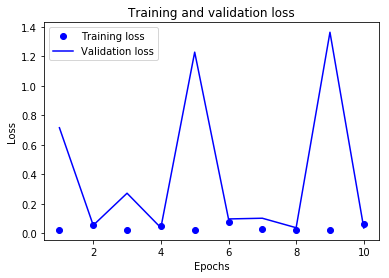

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

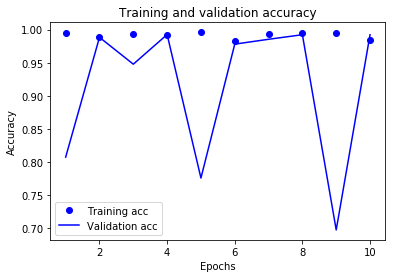

In [18]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
data_submission = pd.read_csv("../input/Kannada-MNIST/sample_submission.csv")

In [20]:
y_pre=model.predict(X_test_actual)     ##making prediction
y_pre=np.argmax(y_pre,axis=1) ##changing the prediction intro labels

In [21]:
data_submission['label']=y_pre
data_submission.to_csv('submission.csv',index=False)

In [22]:
data_submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.ndimage import median_filter
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


Generating adversarial examples...


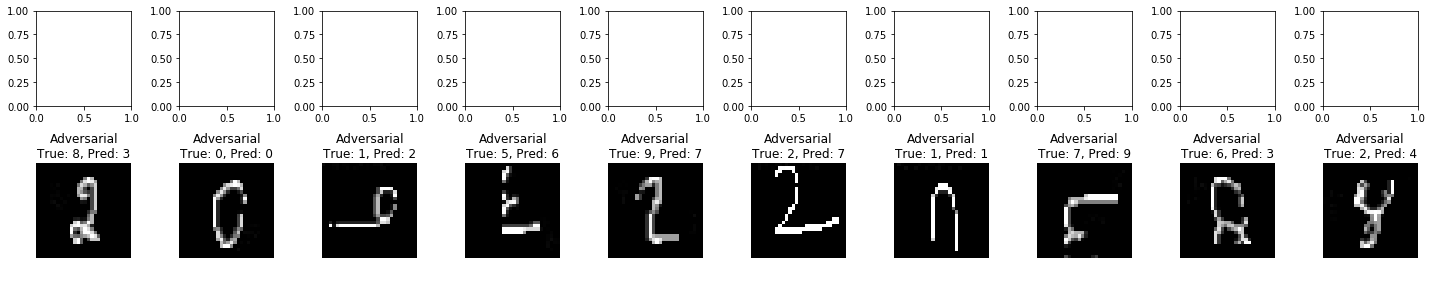

In [24]:
import numpy as np
import time
import matplotlib.pyplot as plt

# ----------------------------
# Adversarial Attack (RLAB)
# ----------------------------
PATCH_SIZE = 2
NOISE_LEVEL = 0.02 
MAX_STEPS = 5
TOP_K_PATCHES = 10

def get_patches(img, patch_size):
    h, w = img.shape[:2]
    patches = []
    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patches.append((i, j))
    return patches

def apply_patch_noise(img, patches, noise_level):
    new_img = img.copy()
    for (i, j) in patches:
        if i + PATCH_SIZE <= img.shape[0] and j + PATCH_SIZE <= img.shape[1]:
            noise = np.random.normal(0, noise_level, (PATCH_SIZE, PATCH_SIZE))
            new_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE, 0] += noise
    return np.clip(new_img, 0, 1)

def l2_dist(img1, img2):
    return np.linalg.norm(img1 - img2)

def rlab_attack_single(model, original_img, original_label, max_time=3):
    if original_img.ndim == 2:
        original_img = np.expand_dims(original_img, -1)

    patches = get_patches(original_img, PATCH_SIZE)
    curr_img = original_img.copy()
    prob = model.predict(curr_img.reshape(1, 28, 28, 1), verbose=0)[0][original_label]
    l2_prev = 0
    start_time = time.time()

    for step in range(MAX_STEPS):
        if time.time() - start_time > max_time:
            break

        patch_scores = []
        for patch in patches:
            temp_img = apply_patch_noise(curr_img, [patch], NOISE_LEVEL)
            pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
            new_prob = pred[original_label]
            l2 = l2_dist(original_img, temp_img)
            score = (prob - new_prob) / (l2 - l2_prev + 1e-8)
            patch_scores.append((score, patch))

        patch_scores.sort(reverse=True, key=lambda x: x[0])
        best_patches = [p for _, p in patch_scores[:TOP_K_PATCHES]]
        temp_img = apply_patch_noise(curr_img, best_patches, NOISE_LEVEL)
        pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
        new_label = np.argmax(pred)
        curr_img = temp_img
        prob = pred[original_label]
        l2_prev = l2_dist(original_img, temp_img)

        if new_label != original_label:
            break

    return curr_img

# ----------------------------
# Run RLAB on 10 Test Images
# ----------------------------
num_samples = 10
adv_examples = np.zeros((num_samples, 28, 28, 1))
print("Generating adversarial examples...")
for i in range(num_samples):
    img = X_test_actual[i]
    label = np.argmax(y_test[i])
    adv_img = rlab_attack_single(model, img, label, max_time=2)
    adv_examples[i] = adv_img

# ----------------------------
# Evaluate
# ----------------------------
original_preds = model.predict(X_test_actual[:num_samples], verbose=0)
adv_preds = model.predict(adv_examples, verbose=0)

# ----------------------------
# Visualize
# ----------------------------
fig, axs = plt.subplots(2, num_samples, figsize=(20, 4))
for i in range(num_samples):

    axs[1, i].imshow(adv_examples[i].reshape(28, 28), cmap='gray')
    axs[1, i].set_title(f"Adversarial\nTrue: {np.argmax(y_test[i])}, Pred: {np.argmax(adv_preds[i])}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


Generating adversarial examples...


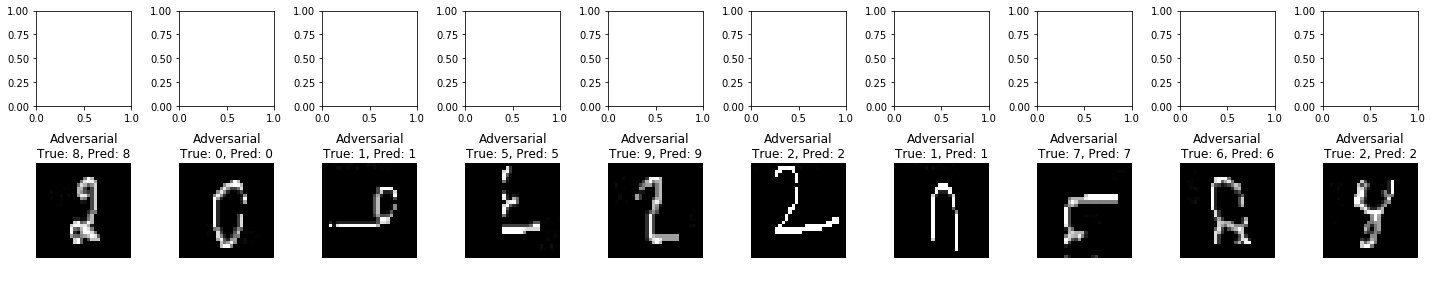

In [30]:
import numpy as np
import time
import matplotlib.pyplot as plt

# ----------------------------
# Adversarial Attack (RLAB)
# ----------------------------
PATCH_SIZE = 2
NOISE_LEVEL = 0.02 
MAX_STEPS = 5
TOP_K_PATCHES = 10

def get_patches(img, patch_size):
    h, w = img.shape[:2]
    patches = []
    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patches.append((i, j))
    return patches

def apply_patch_noise(img, patches, noise_level):
    new_img = img.copy()
    for (i, j) in patches:
        if i + PATCH_SIZE <= img.shape[0] and j + PATCH_SIZE <= img.shape[1]:
            noise = np.random.normal(0, noise_level, (PATCH_SIZE, PATCH_SIZE))
            new_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE, 0] += noise
    return np.clip(new_img, 0, 1)

def l2_dist(img1, img2):
    return np.linalg.norm(img1 - img2)

def rlab_attack_single(model, original_img, original_label, max_time=3):
    if original_img.ndim == 2:
        original_img = np.expand_dims(original_img, -1)

    patches = get_patches(original_img, PATCH_SIZE)
    curr_img = original_img.copy()
    prob = model.predict(curr_img.reshape(1, 28, 28, 1), verbose=0)[0][original_label]
    l2_prev = 0
    start_time = time.time()

    for step in range(MAX_STEPS):
        if time.time() - start_time > max_time:
            break

        patch_scores = []
        for patch in patches:
            temp_img = apply_patch_noise(curr_img, [patch], NOISE_LEVEL)
            pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
            new_prob = pred[original_label]
            l2 = l2_dist(original_img, temp_img)
            score = (prob - new_prob) / (l2 - l2_prev + 1e-8)
            patch_scores.append((score, patch))

        patch_scores.sort(reverse=True, key=lambda x: x[0])
        best_patches = [p for _, p in patch_scores[:TOP_K_PATCHES]]
        temp_img = apply_patch_noise(curr_img, best_patches, NOISE_LEVEL)
        pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
        new_label = np.argmax(pred)
        curr_img = temp_img
        prob = pred[original_label]
        l2_prev = l2_dist(original_img, temp_img)

        if new_label != original_label:
            break

    return curr_img

# ----------------------------
# Feature Squeezing (e.g., 5-bit quantization)
# ----------------------------
def feature_squeeze(X, bits=5):
    levels = 2 ** bits
    return np.floor(X * levels) / levels

# ----------------------------
# ARBD Defense Training Function
# ----------------------------
def train_with_arbd(model, X_train, y_train, num_samples=500, epochs=5, batch_size=64):
    X_adv = np.zeros((num_samples, 28, 28, 1), dtype=np.float32)
    for i in range(num_samples):
        img = X_train[i].reshape(28, 28)
        label = np.argmax(y_train[i])
        adv_img = rlab_attack_single(model, img, label, max_time=3)
        X_adv[i] = adv_img.reshape(28, 28, 1)

    X_squeezed = feature_squeeze(X_train[:num_samples])
    X_adv_squeezed = feature_squeeze(X_adv)
    y_subset = y_train[:num_samples]

    X_combined = np.concatenate([X_squeezed, X_adv_squeezed])
    y_combined = np.concatenate([y_subset, y_subset])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_combined, y_combined, epochs=epochs, batch_size=batch_size)
    return model

# ----------------------------
# Train model with ARBD
# ----------------------------
model = train_with_arbd(model, X_train, y_train, num_samples=1000, epochs=5)

# ----------------------------
# Run RLAB on 10 Test Images
# ----------------------------
num_samples = 10
adv_examples = np.zeros((num_samples, 28, 28, 1))
print("Generating adversarial examples...")
for i in range(num_samples):
    img = X_test_actual[i]
    label = np.argmax(y_test[i])
    adv_img = rlab_attack_single(model, img, label, max_time=2)
    adv_examples[i] = adv_img

# ----------------------------
# Evaluate
# ----------------------------
original_preds = model.predict(X_test_actual[:num_samples], verbose=0)
adv_preds = model.predict(adv_examples, verbose=0)

# ----------------------------
# Visualize
# ----------------------------
fig, axs = plt.subplots(2, num_samples, figsize=(20, 4))
for i in range(num_samples):
    axs[1, i].imshow(adv_examples[i].reshape(28, 28), cmap='gray')
    axs[1, i].set_title(f"Adversarial\nTrue: {np.argmax(y_test[i])}, Pred: {np.argmax(adv_preds[i])}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()
